<p align="center">
  <img src="emnsit.jpg" width="800">
</p>

# <a id='toc1_'></a>[**EMNIST Recongnition Model**](#toc0_)

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author:Adina Abrar</h1>


<p align="center">
  <a href="https://www.linkedin.com/in/adina-abrar" target="_blank">
    <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/linkedin/linkedin-original.svg" width="45" style="margin: 0 10px;"/>
  </a>
  <a href="https://www.kaggle.com/adinaabrar" target="_blank">
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width="45" style="margin: 0 10px;"/>
  </a>
  <a href="https://github.com/Adina-Abrar" target="_blank">
    <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" width="45" style="margin: 0 10px;"/>
  </a>
  <a href="mailto:adinaabrar1111@gmail.com">
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Gmail_Icon.png" width="45" style="margin: 0 10px;"/>
  </a>
</p>

# **Table of contents**<a id='toc0_'></a>    
- [**EMNIST Recongnition Model**](#toc1_)    
- [**Aims And Objectives**](#toc2_)    
- [ **EMNIST Dataset Overview**](#toc3_)    
  - [Dataset Description](#toc3_1_)    
- [**Import Libraries**](#toc4_)    
  - [**Load The DataSet**](#toc4_1_)    
- [**Data Inspection**](#toc5_)    
  - [DataSet Visualization](#toc5_1_)    
  - [Dataset Shape](#toc5_2_)    
  - [Train Test Shape](#toc5_3_)    
  - [Visualizing an EMNIST Image and Its Label](#toc5_4_)    
- [**Pre-Processing**](#toc6_)    
  - [Checking Null Values](#toc6_1_)    
  - [Converting EMNIST Dataset to Numpy Arrays and Normalizing](#toc6_2_)    
- [**CNN Model**](#toc7_)    
  - [Model Building](#toc7_1_)    
  - [Model Summary](#toc7_2_)    
  - [Model Training](#toc7_3_)    
  - [Model Evaluation](#toc7_4_)    
  - [Plot of Training and Validation Accuracy for CNN Model](#toc7_5_)    
  - [Training Analysis](#toc7_6_)    
  - [Saving Model](#toc7_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[**Aims And Objectives**](#toc0_)

In this notebook, we will demonstrate how to perform **handwritten character recognition** on the **EMNIST dataset** using deep learning models. EMNIST is an extension of the classic MNIST dataset, containing **handwritten characters** instead of digits.

We will:
- Load and explore the **EMNIST dataset**.
- Preprocess the data (resizing, normalization, one-hot encoding).
- Build and train a model using **Convolutional Neural Networks (CNN)**.
- Use **early stopping** to optimize training and avoid overfitting.



# <a id='toc3_'></a>[ **EMNIST Dataset Overview**](#toc0_)

The **EMNIST (Extended Modified National Institute of Standards and Technology)** dataset is an extension of the original MNIST dataset. It contains handwritten **letters and digits**, providing a more diverse and challenging dataset for character recognition tasks. EMNIST was introduced to bridge the gap between simple digit recognition and full alphanumeric character recognition, making it an excellent benchmark for deep learning models focused on handwriting recognition.


## <a id='toc3_1_'></a>[Dataset Description](#toc0_)
- **Type:** Handwritten characters (letters and digits)  
- **Total Samples:** 814,255 images  
- **Image Size:** 28 × 28 pixels (grayscale)  
- **Color Channel:** Single-channel (black and white)  
- **EMNIST Letters:** 26 classes (A–Z)  
 
- **Data Split:**  
  - **Training Set:** 697,932 images  
  - **Testing Set:** 116,323 images  




# <a id='toc4_'></a>[**Import Libraries**](#toc0_)

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import string
import os

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import layers, models



## <a id='toc4_1_'></a>[**Load The DataSet**](#toc0_)

In [3]:
# Load EMNIST Letters dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,  # returns (image, label)
    with_info=True
)

# <a id='toc5_'></a>[**Data Inspection**](#toc0_)

In [4]:
print(ds_info)

tfds.core.DatasetInfo(
    name='emnist',
    full_name='emnist/letters/3.1.0',
    description="""
    The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.
    
    Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.
    """,
    config_description="""
    EMNIST Letters
    """,
    homepage='https://www.nist.gov/itl/products-and-services/emnist-dataset',
    data_dir='C:\\Users\\DELL\\tensorflow_datasets\\emnist\\letters\\3.1.0',
    file_format=tfrecord,
    download_size=535.73 MiB,
    dataset_size=44.14 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
    }),
    s

## <a id='toc5_1_'></a>[DataSet Visualization](#toc0_)

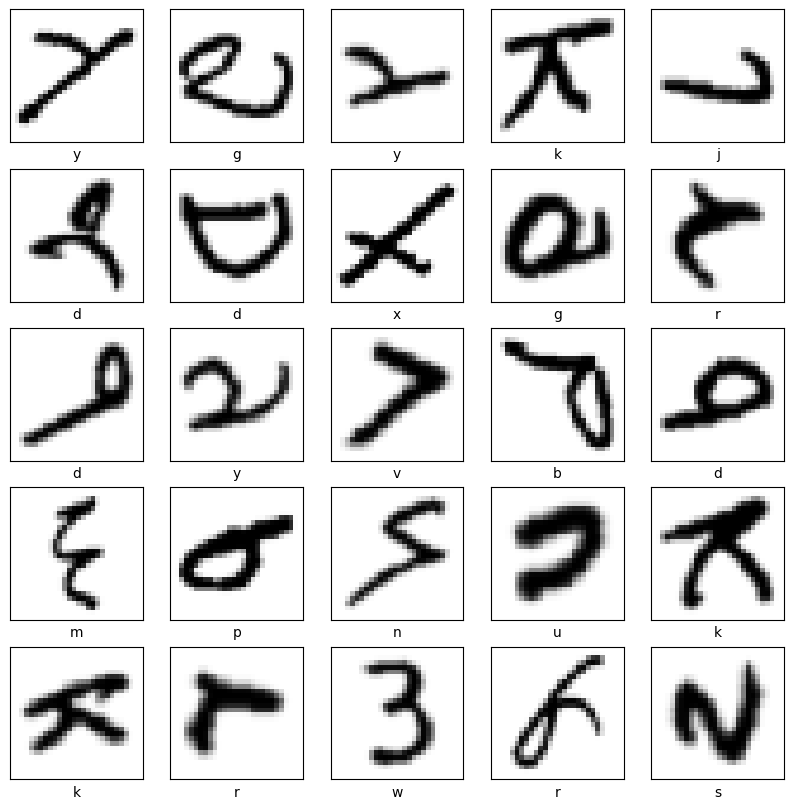

In [5]:
label_map = {i: chr(96+i) for i in range(1, 27)}  

def show_emnist_samples(dataset, n=25):
    dataset = dataset.batch(n)   # take n samples as a batch
    for images, labels in dataset.take(1):
        images = images.numpy()
        labels = labels.numpy()

        plt.figure(figsize=(10,10))
        for i in range(n):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)

            # Handle (28,28) or (28,28,1)
            img = images[i]
            if img.ndim == 3:
                img = img.squeeze(-1)

            plt.imshow(img, cmap=plt.cm.binary)

            # Convert label number to letter (default = number if >26)
            lbl = label_map.get(int(labels[i]), int(labels[i]))
            plt.xlabel(lbl)
        plt.show()

# Call the function
show_emnist_samples(ds_train, n=25)

## <a id='toc5_2_'></a>[Dataset Shape](#toc0_)

In [6]:
# Number of samples comes from dataset info
print("Training set size:", ds_info.splits['train'].num_examples)
print("Test set size:", ds_info.splits['test'].num_examples)

# Peek at one example
for example in ds_train.take(1):
    image, label = example
    print("Image shape:", image.shape)
    print("Label:", label.numpy())


Training set size: 88800
Test set size: 14800
Image shape: (28, 28, 1)
Label: 25


## <a id='toc5_3_'></a>[Train Test Shape](#toc0_)

In [7]:
train_images = []
train_labels = []

for image, label in tfds.as_numpy(ds_train):
    train_images.append(image)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (88800, 28, 28, 1)
Train labels shape: (88800,)


## <a id='toc5_4_'></a>[Visualizing an EMNIST Image and Its Label](#toc0_)

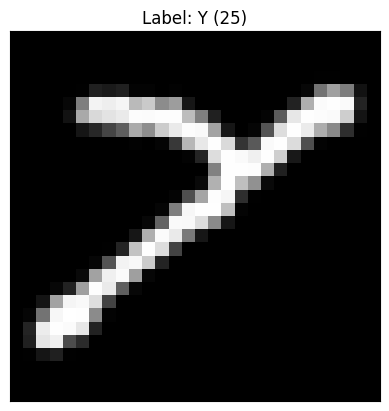

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
  0   0   0   0   0   1  32  26  32   3   3   0   2   0   0   0   0   0   0   0   0   0   7 115 160 125  18   0
  0   0   0   0   7 127 243 238 245 186 202 140 157  22   0   0   0   0   0   0   0  34 175 251 254 250  37   0
  0   0   0   0  18 169 217 228 234 252 251 253 253 189 128  33   0   0   0   4  91 231 254 252 250 206  20   0
  0   0   0   0   0  21  39  69  94 170 142 204 234 252 249 163  22   0   5  84 221 254 235 173 137  46   1   0
  0   0   0   0   0   0   0   0   0   2   0   4  57 183 232 254 218  52  89 250 254 220  7

In [8]:
for image, label in ds_train.take(1):
    img = image.numpy().squeeze()   # shape (28,28)
    lbl = label.numpy()

    # Convert label number → letter (1=A, 2=B, ...)
    label_map = {i: ch for i, ch in enumerate(string.ascii_uppercase, start=1)}
    letter = label_map.get(lbl, str(lbl))

    # Show the image
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Label: {letter} ({lbl})")
    plt.show()

    # Print pixel matrix row by row
    print("Pixel values:")
    for row in img:
        print(" ".join(f"{pixel:3}" for pixel in row))


In this section, we will visualize an image from the **EMNIST dataset**, display its corresponding label as a letter, and print the pixel matrix for the image. 

- The **image** is shown using **matplotlib**, and the **label** is mapped from numeric values (1=A, 2=B, ...) to letters.
- The **pixel matrix** is printed row by row to observe the pixel intensity values for each pixel in the image.

This helps in understanding how the image looks, its label, and its pixel values, which is useful for debugging and analyzing the data.



# <a id='toc6_'></a>[**Pre-Processing**](#toc0_)

## <a id='toc6_1_'></a>[Checking Null Values](#toc0_)

In [9]:
has_nan = False
has_inf = False

for x, y in ds_train:   # loop through dataset batches
    x_np = x.numpy()
    if np.isnan(x_np).any():
        has_nan = True
    if np.isinf(x_np).any():
        has_inf = True

print(f"NaN found? {'Yes' if has_nan else ' No'}")
print(f"Infinite values found? {' Yes' if has_inf else ' No'}")



NaN found?  No
Infinite values found?  No


## <a id='toc6_2_'></a>[Converting EMNIST Dataset to Numpy Arrays and Normalizing](#toc0_)

In this section, we convert the EMNIST images and labels from the TensorFlow Dataset format to **numpy arrays**. Additionally, we **normalize the images** by scaling pixel values to the range `[0, 1]` by dividing by `255.0`. This normalization ensures the model can train more efficiently.

- **Images** are converted from the TensorFlow dataset to numpy arrays and normalized to a floating-point format with values between `0` and `1`.
- **Labels** are extracted as integers from the dataset.

We also check the **shape**, **dtype**, and **min/max values** for both the **training** and **testing** datasets to ensure the conversion is successful.



In [10]:
# Convert to numpy arrays
train_images = np.array([img for img, _ in tfds.as_numpy(ds_train)], dtype="float32") / 255.0
train_labels = np.array([lbl for _, lbl in tfds.as_numpy(ds_train)], dtype="int32")

test_images  = np.array([img for img, _ in tfds.as_numpy(ds_test)], dtype="float32") / 255.0
test_labels  = np.array([lbl for _, lbl in tfds.as_numpy(ds_test)], dtype="int32")

# Check
print("Train:", train_images.shape, train_images.dtype, train_images.min(), train_images.max())
print("Test :", test_images.shape, test_images.dtype, test_images.min(), test_images.max())



Train: (88800, 28, 28, 1) float32 0.0 1.0
Test : (14800, 28, 28, 1) float32 0.0 1.0


The code above extracts **images** and **labels** from the EMNIST training and test datasets, converting them into **numpy arrays** for easier manipulation. After extracting the images, we normalize the pixel values by dividing them by `255.0` so that each pixel's value lies between `0` and `1`, which helps with model convergence during training.

We also print the following information for both the **training** and **test** sets to ensure that the data is processed correctly:
1. **Shape**: The dimensions of the data (should be `(num_samples, 28, 28)` for the images).
2. **Data Type**: The data type of the images and labels (should be `float32` for images and `int32` for labels).
3. **Min and Max values**: To ensure that the pixel values are in the correct range `[0, 1]` after normalization.

This step is crucial before feeding the data into a neural network, as it ensures the input data is appropriately preprocessed for training.


# <a id='toc7_'></a>[**CNN Model**](#toc0_)

## <a id='toc7_1_'></a>[Model Building](#toc0_)

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(27, activation="softmax")  # 27 because EMNIST Letters has 26 letters + 1 (labels 1–26, 0 unused)
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)




## <a id='toc7_2_'></a>[Model Summary](#toc0_)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## <a id='toc7_3_'></a>[Model Training](#toc0_)

In [13]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,                 # You can increase to 15–20 for better accuracy
    batch_size=128,            # Common batch size for EMNIST
    validation_data=(test_images, test_labels),
    verbose=2
)


Epoch 1/10



694/694 - 17s - loss: 0.6470 - accuracy: 0.8029 - val_loss: 0.3690 - val_accuracy: 0.8826 - 17s/epoch - 24ms/step
Epoch 2/10
694/694 - 16s - loss: 0.2926 - accuracy: 0.9053 - val_loss: 0.3097 - val_accuracy: 0.8984 - 16s/epoch - 23ms/step
Epoch 3/10
694/694 - 18s - loss: 0.2354 - accuracy: 0.9208 - val_loss: 0.2804 - val_accuracy: 0.9035 - 18s/epoch - 26ms/step
Epoch 4/10
694/694 - 19s - loss: 0.2039 - accuracy: 0.9311 - val_loss: 0.2667 - val_accuracy: 0.9089 - 19s/epoch - 27ms/step
Epoch 5/10
694/694 - 18s - loss: 0.1814 - accuracy: 0.9378 - val_loss: 0.2481 - val_accuracy: 0.9142 - 18s/epoch - 26ms/step
Epoch 6/10
694/694 - 17s - loss: 0.1610 - accuracy: 0.9436 - val_loss: 0.2474 - val_accuracy: 0.9172 - 17s/epoch - 25ms/step
Epoch 7/10
694/694 - 17s - loss: 0.1461 - accuracy: 0.9479 - val_loss: 0.2380 - val_accuracy: 0.9213 - 17s/epoch - 25ms/step
Epoch 8/10
694/694 - 19s - loss: 0.1333 - accuracy: 0.9510 - val_loss: 0.2554 - val_accuracy: 0.9190 - 19s/epoch - 27ms/step
Epoch 9/10


## <a id='toc7_4_'></a>[Model Evaluation](#toc0_)

In [14]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


463/463 - 2s - loss: 0.2393 - accuracy: 0.9226 - 2s/epoch - 4ms/step

Test accuracy: 0.9226


## <a id='toc7_5_'></a>[Plot of Training and Validation Accuracy for CNN Model](#toc0_)

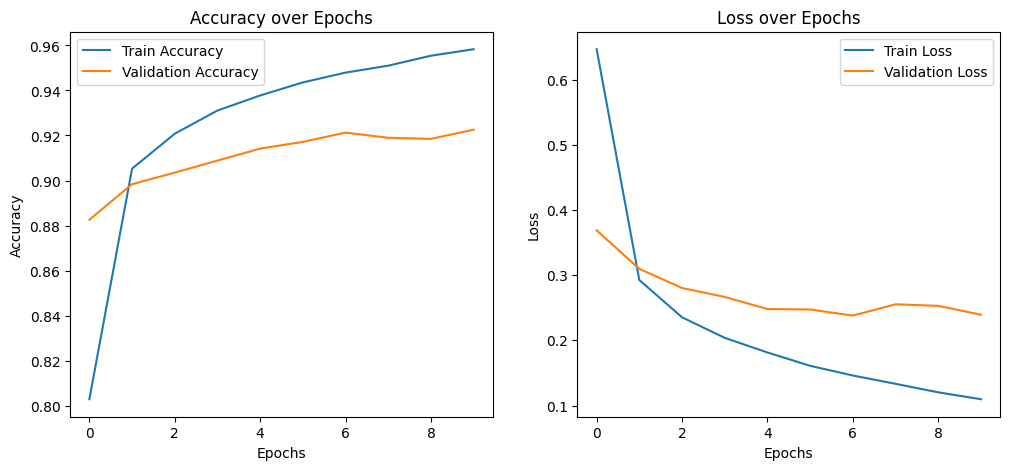

In [15]:
plt.figure(figsize=(12,5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## <a id='toc7_6_'></a>[Training Analysis](#toc0_)

The **accuracy plot** illustrates that the training accuracy shows a steady improvement across epochs, starting around **80%** and reaching approximately **96%** by the final epoch. The validation accuracy follows a similar upward trend, stabilizing around **92%**, which demonstrates the model’s strong ability to generalize to unseen EMNIST samples.

The **loss curve** shows a consistent decrease in training loss from around **0.65** to **0.10**, indicating effective optimization and convergence. The validation loss also reduces smoothly, with only a small gap between the training and validation losses. This stable pattern signifies that the model is **learning efficiently** without significant overfitting.

Overall, the training results confirm that the EMNIST letter recognition model successfully learns meaningful features from handwritten letters and maintains robust performance on validation data.


## <a id='toc7_7_'></a>[Saving Model](#toc0_)

In [16]:
model.save("models_saved/emnist_model.h5")

print(" Model saved successfully at models_saved/emnist_model.h5")

 Model saved successfully at models_saved/emnist_model.h5
